# **PYREFIGHTER - PREDICTION DU TEMPS DE REPONSE DE LA BRIGADE DES POMPIERS DE LONDRES**

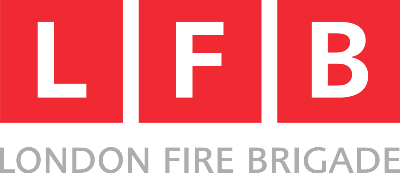

C. Lemaitre ; G. Blais ; H. Obame Obame | BootCamp Data Analyst | Janvier 2021

## **1. PRÉSENTATION DU PROJET**

L’objectif de ce projet est d’analyser et d’estimer les temps de réponse de la Brigade des Pompiers de Londres (London Fire Brigade ~ LFB). La brigade des pompiers de Londres est le service d'incendie et de sauvetage le plus actif du Royaume-Uni et l'une des plus grandes organisations de lutte contre l'incendie et de sauvetage au monde.

## **2. PRÉSENTATION DU JEU DE DONNÉES**

### **2.1 Collecte des données**

Les données sont issues du London Datastore, un site du gouvernement anglais regroupant toutes les données collectées relatives à la capitale. Les données sont téléchargeables aux adresses suivantes :



*  https://data.london.gov.uk/dataset/london-fire-brigade-incident-records
*  https://data.london.gov.uk/dataset/london-fire-brigade-mobilisation-records


Il s’agit de l’ensemble des informations sur les incidents traités par la brigade depuis janvier 2009.

Nos deux jeux de données se présentent comme suit :
*  Le premier jeu de données “LFB incident data” contient le détail de chaque incident traité depuis janvier 2009. Il est constitué d’informations sur la date, le lieu de l'incident ainsi que sur le type d'incident traité ou encore le type de bâtiment touché.
*  Le second jeu de données “LFB mobilisation data” contient le détail de chaque camion de pompiers déployé sur les lieux d'un incident depuis janvier 2009. Il est constitué d’informations sur l'appareil mobilisé, le nombre de véhicules déployés, le lieu de l’incident, le temps de préparation, les heures d'arrivée sur les lieux de l'incident ou encore la durée d’intervention.

Au vu de la quantité de données fournies, nous avons choisi de nous focaliser sur les données les plus récentes (fig 1) car elles sont plus à même de refléter au plus proche la réalité actuelle du terrain (effectifs, équipements, conditions de circulation, environnement) et également afin d’éviter un sur-apprentissage de notre modèle de machine learning détaillé en dernière partie. 


Notre échantillon de données contient donc 606 756 incidents répartis du 1er Janvier 2017 au 31 décembre 2020.


### **2.2 Prétraitement et nettoyage des données**

Le prétraitement des données à été réalisé en plusieurs étapes, à savoir :
*  Fusion des deux datasets en un unique DataFrame (df). Chacune des deux tables contenant un identifiant unique (clé primaire) nommé « IncidentNumber » attribué à chaque incident, cette colonne commune nous a permis de fusionner les deux tables.

*  Sélection des variables d’intérêts (fig 1). Nous choisissons de nous consacrer uniquement aux variables pouvant expliquer le temps de réponse de la brigade. Nous supprimons donc toutes les variables collectées après l’heure d’arrivée sur le lieu d’incident (Exemple : heure de fin d’intervention, heure de retour à la caserne etc…)

*  Création de la variable cible et de variables dérivées du jeu de données :

> *  Variable cible « ResponseTimeMinute ». Le temps de réponse correspond au temps entre l’heure à laquelle les pompiers sont mobilisés et leur heure d’arrivée sur les lieux de l’incident. Après création, nous avons supprimé les incidents pour lesquels le temps de réponse était négatif (0.02 % des données) ou aberrant (supérieur à 60 minutes - 0.11 % des données).


> *  Variables dérivées. Nous avons extrait l’heure, le jour de la semaine et le mois via la fonction datetime et nous les avons stockés dans de nouvelles variables intitulées respectivement «HourMobilised», « WeekdayMobilised »,  « MonthMobilised ». Nous avons également créé la variable «CityCenter» indiquant si le lieu de l’incident a lieu dans le centre de Londres ou en périphérie. Ces variables nous permettront d’étudier les variations de notre variable cible. 

*  Suppression des données manquantes. Nous avons supprimé les données manquantes grâce à la fonction dropna(). Nous avons choisi de les supprimer et non de les remplacer car la proportion de données manquantes était très faible 0,60% de notre jeu de données. Ces données n’avaient donc pas de réel impact sur les résultats. Nous avons donc par la suite travaillé sur un jeu de données de 596 538 lignes.

*  Export du nouveau dataset prétraité. Après la réalisation de ce prétraitement, nous exportons un nouveau dataset «propre» intitulé «Pyrefighter_cleaned_database.csv» qui servira dans un premier temps à la réalisation de la datavisualisation, puis aux modélisations par machine learning afin de prédire le temps de réponse de la brigade des pompiers de Londres.


Après ce nettoyage, notre nouveau dataset est composé des 13 variables suivantes :


---


fig 1 : Liste des variables exploitées

> *  ResponseTimeMinute : Temps en minutes entre l’heure de mobilisation et l’heure d’arrivée sur le lieu de l’incident (Variable cible)
> *  IncidentNumber : Numéro unique d’incident
> *  PropertyCategory : Type de propriété concerné 
> *  AddressQualifier : Précision de l’adresse communiquée
> *  IncGeo_BoroughName : Nom d’arrondissement
> *  IncidentStationGround : Nom de la caserne responsable de la zone d’incident
> *  FirstPumpArriving_DeployedFromStation : Nom de la caserne étant arrivée la première sur le lieu de l’incident
> *  DeployedFromStation_Name : Nom de la caserne déployée
> *  DeployedFromLocation : Lieu où se trouve l’équipe au moment de la mobilisation (Propre caserne ou autre caserne)
> *  PumpOrder : Ordre d'arrivée des camions sur le lieu de l'incident
> *  HourMobilised : Heure de mobilisation
> *  WeekdayMobilised : Jour de mobilisation
> *  MonthMobilised : Mois de mobilisation
> *  CalYear : Année de mobilisation
> *  CityCenter : Booléen indiquant si le lieu de l’incident est dans le centre ville ou non.


---





## **3. DATA VISUALISATION ET ANALYSES STATISTIQUES**

Cette première étape de visualisation nous permet de mieux appréhender nos données. En effet, cela nous permet de comprendre les différents liens et corrélations entre nos variables, émettre certaines hypothèses et enfin, mieux préparer le dataframe pour le Machine Learning.

### **3.1 Etude du temps de réponse de la brigade**

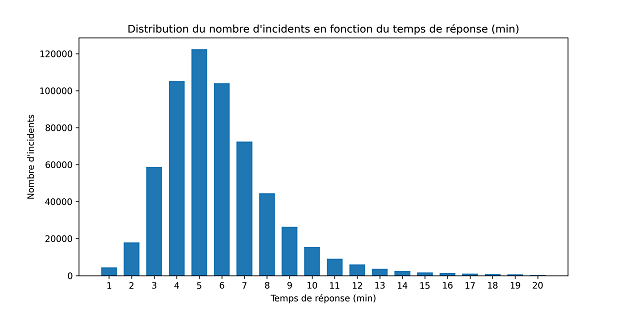

Cette première visualisation permet de constater que le temps de réponse des pompiers est majoritairement compris entre 3 et 8 min. Le temps de réponse médian est de 5 min et pour 75% des incidents les pompiers arrivent sur les lieux en 7 min maximum. 
Le temps de réponse des pompiers est donc très court. Ainsi, notre modèle de prédiction devait avoir un temps d'exécution court et une précision de l'ordre de la minute.

### **3.2 Etude du temps de réponse en fonction de l’heure de la journée**

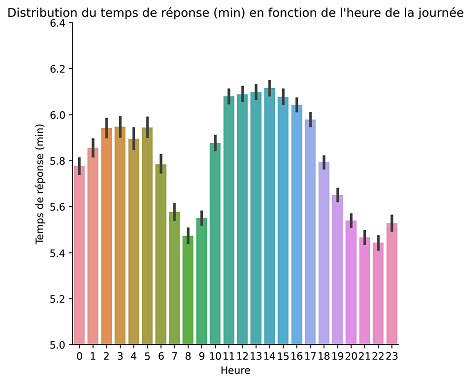

Nous constatons que le temps de réponse moyen varie peu au cours de la journée. En effet, le temps moyen est compris entre 5,4 et 6,2 minutes. L’échelle a ici été adaptée de façon à mieux visualiser la variation au cours de la journée.
Le temps de réponse le plus faible est atteint à 8h, ce temps augmente jusqu'à 14h pour atteindre sa valeur maximale puis diminue jusqu'à 22h pour augmenter et atteindre un second pic vers 5h du matin.
Cependant, la différence entre le temps de réponse à 8h (5 min 29 sec) et à 14h (6 min et 8 sec) n’est que de 39 sec. Nous pouvons donc nous demander si cette différence est réellement significative.


|               |     df |         sum_sq |    mean_sq |       F |        PR(>F) |
|:--------------|-------:|---------------:|-----------:|--------:|--------------:|
| HourMobilised |      1 | 2385.15        | 2385.15    | 388.049 |   2.34454e-86 |
| Residual      | 599694 |    3.68603e+06 |    6.14651 | nan     | nan           |

La p-value (PR(>F)) est inférieure à 5%, cela confirme que l’heure à laquelle a lieu un incident a un effet statistiquement significatif sur le temps de réponse des pompiers.


Par ailleurs, on pourrait se demander si le temps de réponse n’est pas lié au nombre d’incidents en cours à chaque heure de la journée. S’il y a en moyenne beaucoup d’incidents à une heure précise de la journée, les pompiers pourraient être débordés et alors mettre plus de temps à intervenir.

Nous nous intéressons donc ici à la distribution du nombre d’incidents dans une journée :


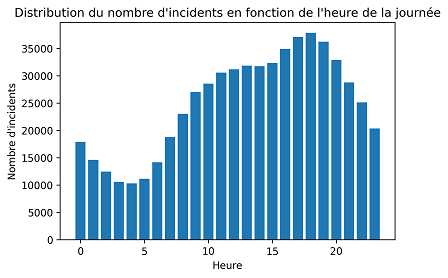

Nous remarquons que le pic d’incidents est atteint à 18h, heure à laquelle le temps de réponse est dans la moyenne. Par ailleurs, c’est à 3h et 4h que le nombre d’incidents est le plus faible, heures auxquelles les temps de réponse sont en moyenne de 5min 57sec et 5min 54sec soit dans la moyenne haute du temps d’intervention.

Le temps de réponse n’est donc pas lié au nombre d’incidents en cours.


### **3.3 Etude du temps de réponse en fonction du jour de la semaine**

Nous regardons ici l’évolution du temps de réponse en fonction du jour de la semaine.


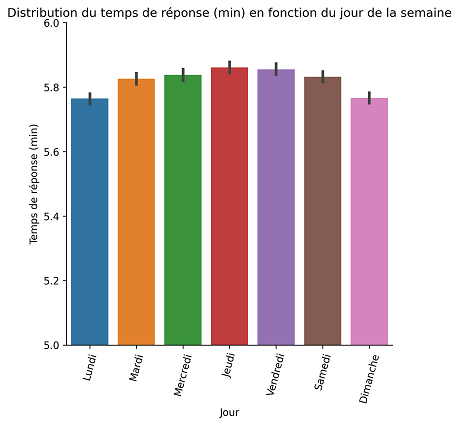

Nous constatons que le temps de réponse moyen varie peu au cours de la semaine. En effet, le temps moyen est compris entre 5,78 min (soit 5 min 47 sec) et 5,87 min (soit 5 min et 52 sec). L’échelle a ici été adaptée de façon à mieux visualiser la variation au cours de la semaine.

On voit que les temps de réponse les plus faibles sont atteints les lundis et dimanches tandis que le temps de réponse le plus élevé est atteint le jeudi. 
Nous pouvons donc nous demander si la différence entre les différents jours de la semaine est réellement significative.


|                  |     df |      sum_sq |   mean_sq |         F |     PR(>F) |
|:-----------------|-------:|------------:|----------:|----------:|-----------:|
| WeekdayMobilised |      1 | 2.89485     |   2.89485 |   0.47067 |   0.492679 |
| Residual         | 599694 | 3.68841e+06 |   6.15048 | nan       | nan        |

La p-value (PR(>F)) est supérieure à 5%, cela confirme que le jour de la semaine n’a pas d’influence statistiquement significative sur le temps de réponse des pompiers.

### **3.4 Etude du temps de réponse en fonction du mois**

Nous visualisons ici l’évolution du temps de réponse en fonction du mois de l’année.


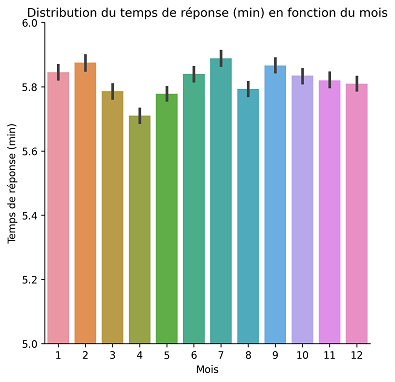

De la même façon que pour les jours de la semaine, le temps de réponse semble peu varier en fonction du mois de l’année. L’échelle a ici été adaptée de façon à mieux visualiser la variation au cours de l’année.
C’est en avril que le temps de réponse est le plus bas (5min 43sec) et en juillet qu’il est le plus haut (5 min 54 sec) soit une différence moyenne de 11 sec entre ces 2 valeurs.


|                |     df |      sum_sq |   mean_sq |         F |     PR(>F) |
|:---------------|-------:|------------:|----------:|----------:|-----------:|
| MonthMobilised |      1 | 11.8801     |  11.8801  |   1.93158 |   0.164586 |
| Residual       | 599694 |  3.6884e+06 |   6.15047 | nan       | nan        |


Comme attendu, la p-value (PR(>F)) est supérieure à 5% cela confirme donc que le mois de l’année n’a pas d’influence statistiquement significative sur le temps de réponse.

### **3.5 Etude du temps de réponse en fonction de l'heure, du mois et de l'année**

Nous nous intéressons ici à la variation du temps de réponse en fonction de l’heure de la journée et de l’année :

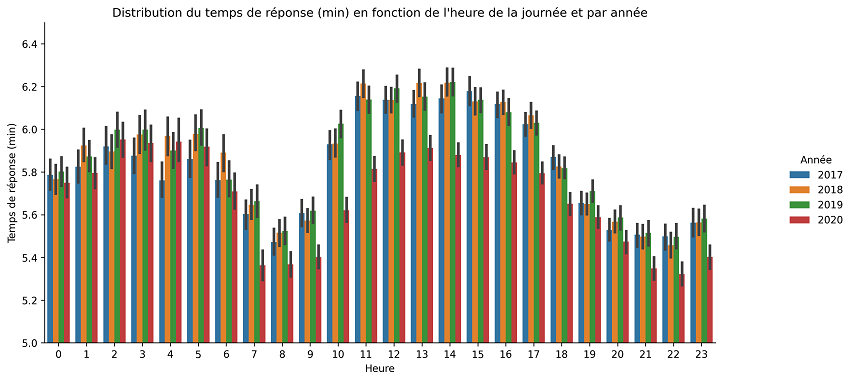

Nous observons que les variations sont majoritairement les mêmes pour les années 2017, 2018 et 2019. Néanmoins, en 2020, le temps de réponse est nettement plus faible en journée. Le confinement de la ville de Londres a donc eu un impact et a ainsi facilité l’intervention des pompiers en journée.
Regardons maintenant si cette différence est visible à l’échelle du mois :


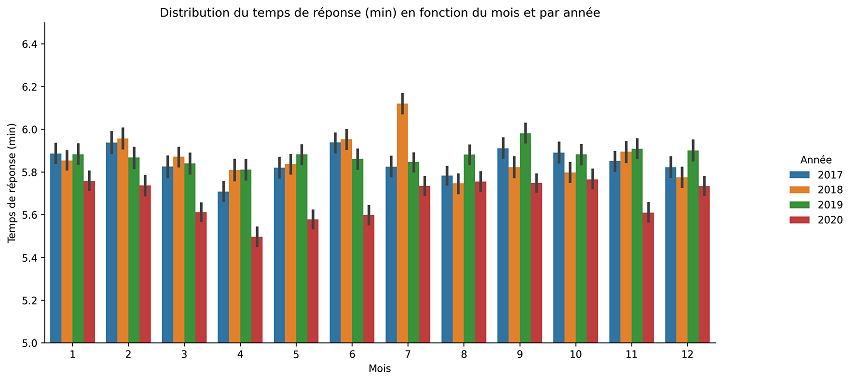

Nous observons que le temps de réponse moyen est systématiquement plus faible à chaque mois de l'année en 2020.
Notons également que la différence est nettement plus importante pour les mois d'avril, mai et novembre, mois de l'année pendant lesquels la ville de Londres était complètement confinée.


### **3.6 Etude du temps de réponse en fonction du type de propriété**

Nous visualisons ici la variation du temps de réponse en fonction du type de propriété dans lequel a lieu l’incident :

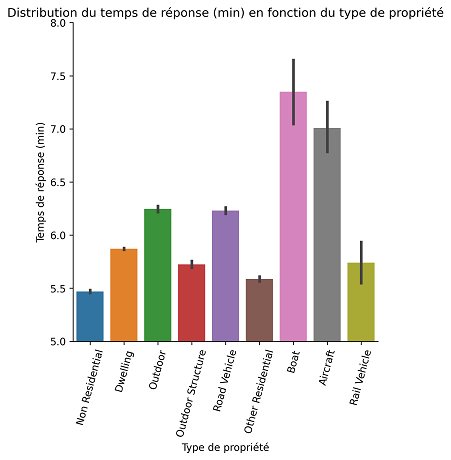

Nous observons une grande différence de temps d’intervention en fonction du type de propriété. En effet, ce temps est bien plus élevé lorsque l’incident a lieu sur un bateau (7 min 22 sec) ou un avion (7 min 01 sec) que lorsqu’il a lieu dans une habitation (5 min 53 sec). Le type de propriété semble donc avoir une influence sur le temps de réponse.

|                  |     df |          sum_sq |    mean_sq |       F |   PR(>F) |
|:-----------------|-------:|----------------:|-----------:|--------:|---------:|
| PropertyCategory |      8 | 33761.6         | 4220.2     | 692.488 |        0 |
| Residual         | 599687 |     3.65465e+06 |    6.09426 | nan     |      nan |

La p-value (PR(>F)) est nulle, cela confirme que le type de propriété a une influence statistiquement significative sur le temps de réponse.

### **3.7 Etude du temps de réponse en fonction de l'exactitude de l'adresse**

Nous visualisons ici la variation du temps de réponse en fonction de l’exactitude de l’adresse indiquée par la personne ayant prévenue les secours :

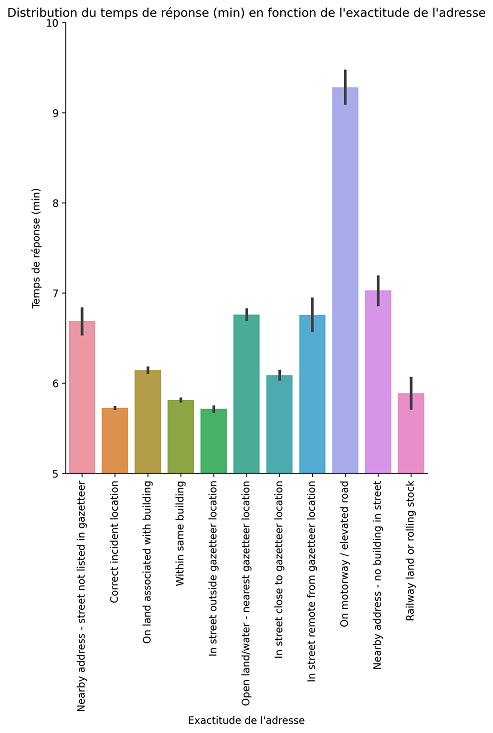

Nous observons que le temps de réponse le plus faible est obtenu lorsque l'adresse est correcte (5 min 44 sec). Une adresse approximative peut augmenter le temps de réponse d’une minute.
Par ailleurs, le temps de réponse le plus long est obtenu lorsque l'incident se trouve sur une autoroute ou une route surélevée (9 min 19 sec). En effet, il est plus difficile d'indiquer une localisation précise sur ce type de lieu.
L’indication du lieu de l’incident semble donc avoir une réelle influence sur le temps de réponse des pompiers.


|                  |     df |          sum_sq |    mean_sq |       F |   PR(>F) |
|:-----------------|-------:|----------------:|-----------:|--------:|---------:|
| AddressQualifier |     10 | 49726.8         | 4972.68    | 819.539 |        0 |
| Residual         | 599685 |     3.63868e+06 |    6.06766 | nan     |      nan |

La p-value (PR(>F)) est nulle cela confirme que l’indication du lieu de l’incident a une influence statistiquement significative sur le temps de réponse des pompiers. Il est donc primordial d’obtenir le plus d’indications précises possibles de la part de la personne appelant les secours.

### **3.8 Etude du temps de réponse en fonction de l'arrondissement où l'incident a eu lieu**

Nous visualisons ici la distribution du temps de réponse en fonction de la localisation de l’incident (arrondissement) :

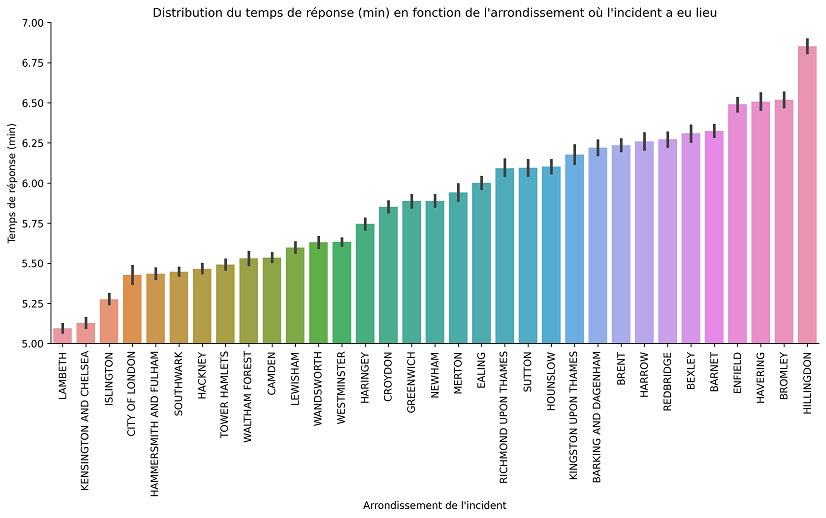

Nous observons qu’il y a une grande disparité en termes de temps d’intervention entre les différents arrondissements. Le temps de réponse varie de 5 min 06 sec pour l’arrondissement de Lambeth à 6 min 52 sec pour l’arrondissement de Hillingdon.
Nous supposons donc que le lieu de l’incident a une influence sur le temps de réponse des pompiers.


|                    |     df |           sum_sq |    mean_sq |       F |   PR(>F) |
|:-------------------|-------:|-----------------:|-----------:|--------:|---------:|
| IncGeo_BoroughName |     32 | 112396           | 3512.38    | 588.991 |        0 |
| Residual           | 599663 |      3.57602e+06 |    5.96337 | nan     |      nan |

La p-value (PR(>F)) est nulle, cela confirme que le lieu de l’incident (arrondissement) a une influence statistiquement significative sur le temps de réponse des pompiers.

### **3.9 Etude du temps de réponse en fonction de la localisation de l'incident centre ville/périphérie**

Nous visualisons ici la distribution du temps de réponse en fonction de la localisation en ville ou en périphérie de l’incident :

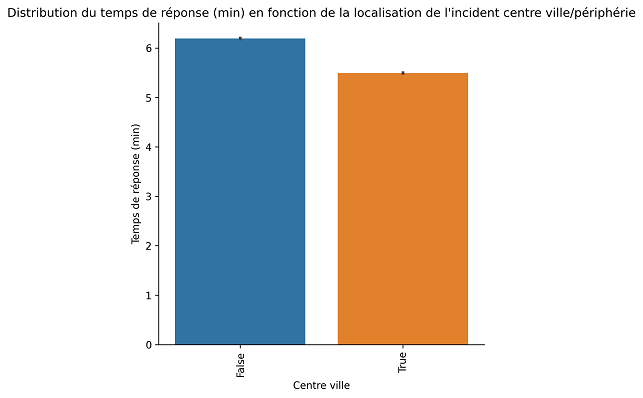

Nous observons que le temps d’intervention est plus faible en centre ville (5 min 30 sec) qu’en périphérie (6 min 12 sec). 

|            |     df |          sum_sq |     mean_sq |       F |   PR(>F) |
|:-----------|-------:|----------------:|------------:|--------:|---------:|
| CityCenter |      1 | 72757.5         | 72757.5     | 12067.6 |        0 |
| Residual   | 599694 |     3.61565e+06 |     6.02916 |   nan   |      nan |

La p-value (PR(>F)) est nulle, cela confirme que le lieu de l’incident (centre ville / périphérie) a une influence statistiquement significative sur le temps de réponse des pompiers.

### **3.10 Etude du temps de réponse en fonction de la caserne responsable de la zone d'incident**

Nous visualisons ici la distribution du temps de réponse en fonction de la caserne responsable de la zone d’incident :

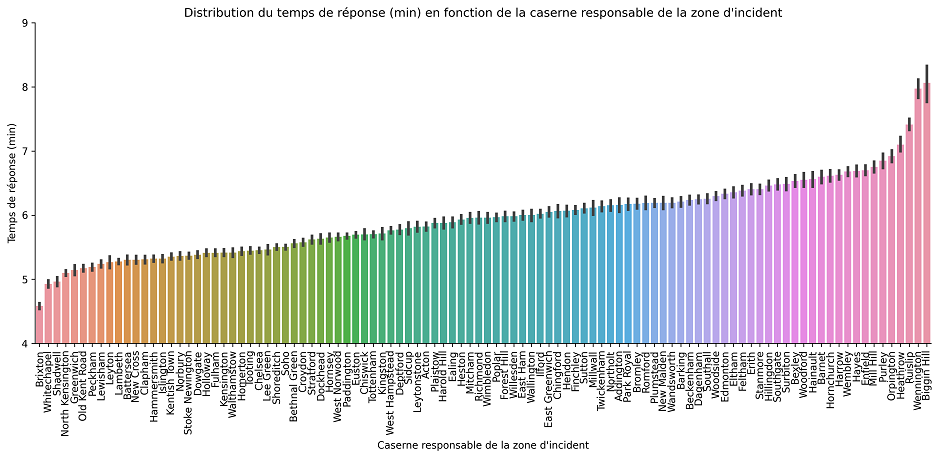

Nous observons qu’il y a une grande disparité en termes de temps d’intervention entre les différentes casernes. Le temps de réponse varie de 4 min 35 sec pour la caserne de Brixton à 8 min 06 sec pour la caserne de Biggin Hill.
Nous supposons donc que la caserne responsable de l’incident a une influence sur le temps de réponse des pompiers.


|                       |     df |           sum_sq |    mean_sq |       F |   PR(>F) |
|:----------------------|-------:|-----------------:|-----------:|--------:|---------:|
| IncidentStationGround |    101 | 158936           | 1573.62    | 267.329 |        0 |
| Residual              | 599594 |      3.52948e+06 |    5.88644 | nan     |      nan |

La p-value (PR(>F)) est nulle, cela confirme que la caserne responsable de l’incident a une influence statistiquement significative sur le temps de réponse des pompiers.

### **3.11 Etude du temps de réponse en fonction du 1er camion arrivé sur les lieux**

Nous visualisons ici la distribution du temps de réponse en fonction du premier camion (nom de la caserne correspondante) arrivé sur la zone d’incident :

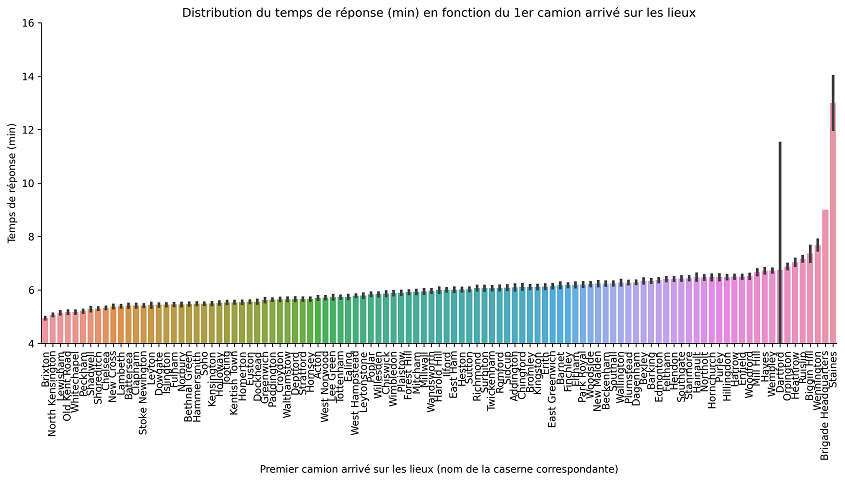

Nous observons qu’il y a à nouveau une grande disparité dans les temps de réponse des pompiers. 
Des valeurs extrêmes sont obtenues pour les camions provenant des casernes de Staines (14 min 00 sec) et de Dartford (10 min 00 sec). Néanmoins, nous n’avons respectivement qu’une seule et deux données disponibles pour ces casernes. 


|                                       |     df |           sum_sq |    mean_sq |       F |   PR(>F) |
|:--------------------------------------|-------:|-----------------:|-----------:|--------:|---------:|
| FirstPumpArriving_DeployedFromStation |    104 | 123671           | 1189.14    | 200.014 |        0 |
| Residual                              | 599591 |      3.56474e+06 |    5.94529 | nan     |      nan |

La p-value (PR(>F)) est nulle cela confirme que le premier camion (nom de la caserne correspondante) arrivé sur la zone d’incident a une influence statistiquement significative sur le temps de réponse des pompiers.

### **3.12 Etude du temps de réponse en fonction de la caserne déployée**

Nous visualisons ici la distribution du temps de réponse en fonction de la caserne déployée :

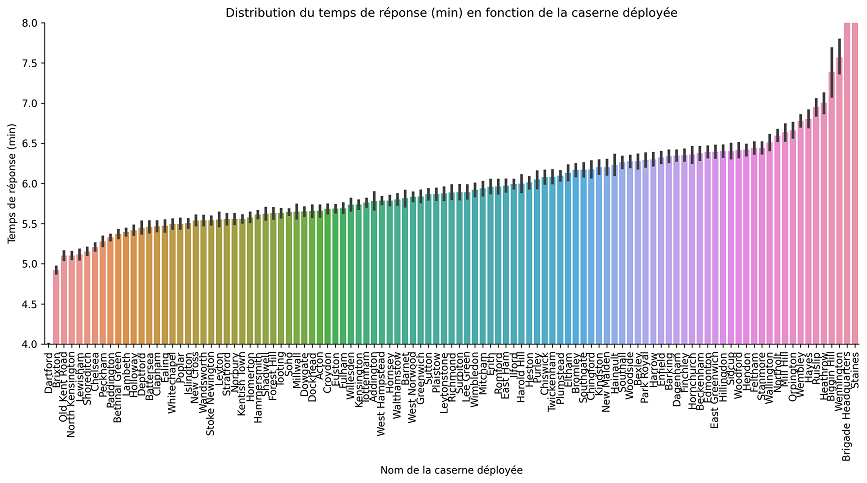

Nous observons à nouveau une grande disparité en termes de temps d’intervention entre les différentes casernes. Le temps de réponse varie de 4 min 56 sec pour la caserne de Brixton à 7 min 37 sec pour la caserne de Wennington.

|                          |     df |           sum_sq |    mean_sq |       F |   PR(>F) |
|:-------------------------|-------:|-----------------:|-----------:|--------:|---------:|
| DeployedFromStation_Name |    104 | 115131           | 1107.03    | 185.758 |        0 |
| Residual                 | 599591 |      3.57328e+06 |    5.95953 | nan     |      nan |

La p-value (PR(>F)) est nulle, cela confirme que la caserne de provenance des pompiers a une influence statistiquement significative sur leur temps de réponse.

### **3.13 Etude du temps de réponse en fonction du lieu de déploiement de la brigade**

Nous visualisons ici la variation du temps de réponse en fonction du lieu de déploiement de la brigade :

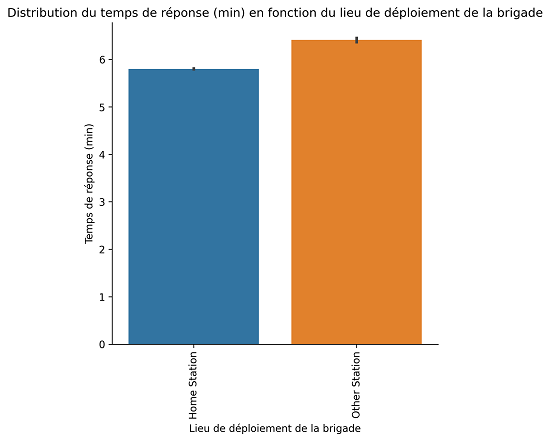

Nous observons que le temps de réponse est en moyenne bien inférieur lorsque la brigade se trouve à leur caserne lors de l’appel (5 min 49 sec contre 6 min 26 sec) ce qui représente 97% des cas.

|                      |     df |         sum_sq |    mean_sq |       F |        PR(>F) |
|:---------------------|-------:|---------------:|-----------:|--------:|--------------:|
| DeployedFromLocation |      1 | 7385.5         | 7385.5     | 1203.21 |   2.2393e-263 |
| Residual             | 599694 |    3.68103e+06 |    6.13817 |  nan    | nan           |

La p-value (PR(>F)) est inférieure à 5%, cela confirme que le lieu de déploiement de la brigade a une influence statistiquement significative sur son temps de réponse.

##### **CONCLUSION DE LA VISUALISATION**

L’ensemble de ces visualisations et études nous permet d’avoir une meilleure connaissance de notre jeu de données ainsi que de l’évolution de notre variable cible (temps de réponse). De même, celles-ci nous permettent de détecter les interactions entre les variables.

Ainsi, nous avons pu observer que nombreuses variables du data avaient une influence significative sur le temps de réponse. 

Ces variables sont dites “variables explicatives” de notre variable cible et ce sont donc celles que nous allons utiliser par la suite dans nos modélisations par machine learning


## **4. MODÉLISATION PAR MACHINE LEARNING**



L’objectif de nos expérimentations de Machine Learning est de réaliser un modèle permettant de prédire au mieux le temps de réponse d’un véhicule de la Brigade des Pompiers de Londres.

Pour ces expérimentations, nous avons sélectionné les variables ayant une influence statistiquement significative sur le temps de réponse (notre variable target). 

Voici la liste des variables explicatives utilisées pour l’élaboration de nos modèles :

*   ResponseTimeMinute
*   PropertyCategory
*   IncGeo_BoroughName
*   IncidentStationGround
*   DeployedFromStation_Name
*   DeployedFromLocation
*   HourMobilised
*   WeekdayMobilised
*   MonthMobilised
*   CityCenter

Nous décidons ainsi de ne pas intégrer les variables suivantes à nos modèles :

*   IncidentNumber : Chiffre aléatoire inexploitable
*   CalYear : Echelle trop grande pour notre variable cible
*   AddressQualifier : Variable renseignée à la fin de l’intervention
*   FirstPumpArriving_DeployedFromStation : Variable renseignée à la fin de l’intervention
*   PumpOrder (nous considérons uniquement les lignes PumpOrder = 1 correspondant à l’arrivée du premier camion).

En effet, ces variables ne sont pas pertinentes pour l'entraînement de notre modèle de prédiction.


## 4.1. Pré-processing des données pour le Machine Learning

Étant donné la taille importante de notre dataset, nous avons tout d’abord décidé de réaliser la recherche des hyperparamètres sur une portion réduite mais représentative de notre DataFrame complet. Ainsi, le temps d’exécution est réduit et permet le test d’un plus grand nombre de paramètres différents. Pour cela, nous avons sélectionné aléatoirement 10 000 lignes de notre dataset à l’aide de la méthode sample(n = 10000) et avons également appliqué une random_state = 42 pour la reproductibilité des résultats.

Nous avons ensuite décidé d’intégrer l’entièreté de notre preprocessing dans une pipeline. La pipeline permet d’enchaîner plusieurs transformations dans un seul et même objet. Son grand avantage est que lors de l’utilisation de l’outil Gridsearch pour la sélection des paramètres optimaux, la recherche est réalisée sur tous les transformateurs et modèles de la Pipeline simultanément.

Nous allons maintenant détailler l’ensemble des transformations que nous avons appliquées à notre jeu de données.

La première étape est de conserver uniquement les données pour le 1er camion arrivé sur les lieux (PumpOrder = 1).

Nous supprimons ensuite les variables non pertinentes (listées précédemment) à l’aide de la méthode to_drop.

 Nous définissons les variables qualitatives comme ‘categorical’ : variables qui pourront être encodées via différentes méthodes. Nous nous sommes assurés que ces variables soient de type string en appliquant la méthode astype().

Nous divisons ensuite notre jeu de données de façon à séparer notre variable cible, ResponseTimeMinute qui représente le temps de réponse des pompiers, de nos variables explicatives listées ci-dessous :

*   PropertyCategory
*   IncGeo_BoroughName
*   IncidentStationGround
*   DeployedFromStation_Name
*   DeployedFromLocation
*   HourMobilised
*   WeekdayMobilised
*   MonthMobilised
*   CityCenter


Afin d’évaluer les performances de nos modèles, nous séparons notre dataset entre un ensemble d’entraînement (X_train, y_train) sur lequel s’entrainera nos modèles et un ensemble de test (X_test, y_test) qui permettra d’attester de la qualité du modèle une fois entraîné.

Nous avons également déterminé 3 variables pour lesquelles leurs interactions pourraient affecter la variable cible. Il s’agit des 3 variables suivantes : 

*   HourMobilised
*   WeekdayMobilised
*   CityCenter

Nous avons estimé que l’association des ces 3 variables pourraient véritablement affecter le temps de réponse. En effet, le temps de réponse devrait être différent pour un incident ayant lieu le lundi à 8h en plein centre de Londres en comparaison à un incident ayant lieu un mercredi à 2h du matin dans la périphérie de Londres. 

Cette association de variable a pu être testée dans tous les modèles sauf ceux de type arbre à l’aide de la méthode PolynomialFeatures() à laquelle nous avons ajouté différents types d’encodage que nous détaillerons plus bas.

Nous avons ensuite utilisé un préprocesseur qui nous a permis de transformer nos données en une seule étape. Ainsi, nous avons pu à la fois de :

* Supprimer les données non pertinentes (to_drop).
* Tester l’association polynomiale de variables (PolynomialFeatures).
* Encoder les variables qualitatives à l’aide de différents encoders.

Les différents encodeurs de variables qualitatives que nous avons testés sont : 
* OneHotEncoder : Il s'agit de diviser la colonne qui contient les données numériques des catégories en plusieurs colonnes en fonction du nombre de catégories présentes dans cette colonne. Chaque colonne contient "0" ou "1" correspondant à la colonne dans laquelle elle a été placée.

* TargetEncoder : Processus de remplacement d'une valeur catégorielle par la moyenne de la variable cible. Toutes les colonnes non catégoriques sont automatiquement abandonnées par le modèle de l'encodeur cible.

* CountEncoder : Remplace chaque valeur catégorielle par le nombre de fois qu'elle apparaît dans l'ensemble de données.


## 4.2. Expérimentation Machine Learning


Pour nos expérimentations de machine learning, nous avons sélectionné quatre méthodes :
* Régression Linéaire
* Ridge Regressor
* Lasso Regressor
* Gradient Boosting Regressor
 
Pour chacun de ces modèles, nous avons sélectionné les paramètres optimaux à l’aide de la fonction GridSearchCV. Cette fonction teste chaque combinaison de paramètres par validation croisée et sélectionne la combinaison optimale de paramètres pour notre modèle.
 
Nous avons ensuite entraîné chacun des modèles et mesuré leurs performances en calculant les scores suivants :
* L’erreur quadratique moyenne du jeu d’entraînement (Mean Squared Error (MSE train)
* L’erreur moyenne absolue du jeu d’entraînement (Mean Absolute Error (MAE train)
* L’erreur quadratique moyenne du jeu de test (Mean Squared Error (MSE train)
* L’erreur moyenne absolue du jeu de test (Mean Absolute Error (MAE test)
* L’erreur relative du jeu de test (MAE test / comptage moyen)


### 4.2.1 Régression Linéaire

Pour la régression linéaire, nous avons fait le choix d’appliquer à l’aide de pipelines l’ensemble des méthodes et paramètres suivants :

*   Pour l’association des 3 variables 'HourMobilised', 'WeekdayMobilised' et 'CityCenter' :

> 1. PolynomialFeatures
> 2. OneHotEncoder
> 3. TargetEncoder

*   Pour les variables qualitatives :

> 1.   TargetEncoder
> 2.   CountEncoder


A l’aide de la fonction GridSearchCV, nous avons également sélectionné les paramètres optimaux suivants :
* Pour la régression linéraire : fit_intercept = False
* Pour les poly_features : poly__degree = 10
* Pour le CountEncoder : min_group_size = 2

Nous avons entraîné notre modèle de régression linéaire sur l’ensemble de notre dataset en appliquant l’ensemble de ces paramètres et méthodes et avons obtenu les résultats suivants :

* Score MSE train : 4,430
* Score MAE train (en minute) : 1,515
* Score MSE test 4,454
* Score MAE test (en minute) 1,519
* Relative test error : 0,29

Le temps d’exécution de ce modèle était (sur un ordinateur personnel) de 33,39 secondes.

Le modèle de régression linéaire est un modèle dit “simple”. Ces résultats nous ont servi comme base de référence pour l’ensemble de nos modèles suivants.

### 4.2.2 Ridge Regressor

Pour le Ridge Regressor, nous avons fait le choix d’appliquer à l’aide de pipelines l’ensemble des méthodes et paramètres suivants :

* Pour l’association des 3 variables 'HourMobilised', 'WeekdayMobilised' et 'CityCenter' :

> 1. PolynomialFeatures
> 2. OneHotEncoder
> 3. TargetEncoder

* Pour les variables qualitatives :

> 1. TargetEncoder
> 2. CountEncoder

A l’aide de la fonction GridSearchCV, nous avons également sélectionné les paramètres optimaux suivants :
* Pour le Ridge : alpha = 10
* Pour les poly_features : poly__degree = 2
* Pour le CountEncoder : min_group_size = 10

Nous avons entraîné notre modèle Ridge Regressor sur l’ensemble de notre dataset en appliquant l’ensemble de ces paramètres et méthodes et avons obtenu les résultats suivants :
* Score MSE train : 4,430
* Score MAE train (en minute) : 1,515
* Score MSE test 4,454
* Score MAE test (en minute) 1,519
* Relative test error: 0,291

Le temps d’exécution de ce modèle était (sur un ordinateur personnel) de 21,05 secondes.

Nous observons que les résultats obtenus à l’aide de Ridge Regressor sont comparables à ceux obtenus par régression linéaire. Néanmoins, à performance comparable, le temps d'exécution est inférieur (21 secs contre 33 secs). 

Cette différence n’est pas négligeable dans notre cas car nous essayons de prédire un évènement d’une durée de quelques minutes dans une situation d’urgence.

### 4.2.3 Lasso Regressor

Pour le Lasso Regressor, nous avons fait le choix d’appliquer à l’aide de pipelines l’ensemble des méthodes et paramètres suivants :
* Pour l’association des 3 variables 'HourMobilised', 'WeekdayMobilised' et 'CityCenter' :

> 1. PolynomialFeatures
> 2. OneHotEncoder
> 3. TargetEncoder

* Pour les variables qualitatives :

> 1. TargetEncoder
> 2. CountEncoder

A l’aide de la fonction GridSearchCV, nous avons également sélectionné les paramètres optimaux suivants :
* Pour le Ridge : alpha = 1e-06
* Pour les poly_features : poly__degree = 2
* Pour le CountEncoder : min_group_size = 10

Nous avons entraîné notre modèle Lasso Regressor sur l’ensemble de notre dataset en appliquant l’ensemble de ces paramètres et méthodes et avons obtenu les résultats suivants :
* Score MSE train : 4,430
* Score MAE train (en minute) : 1,515
* Score MSE test : 4,454
* Score MAE test (en minute) : 1,519
* Relative test error : 0,291

Le temps d’exécution de ce modèle était (sur un ordinateur personnel) de 98,664 secondes soit 1,64 minutes.

Nous observons que les résultats obtenus à l’aide du Lasso Regressor sont identiques à ceux obtenus avec les deux modèles précédents. 
Toutefois, en comparaison au temps d’exécution trop important, ce modèle est rejeté au vu de notre problématique.

### 4.2.4 Gradient Boosting Regressor

Pour le Gradient Boosting Regressor, nous avons fait le choix d’appliquer à l’aide de pipelines l’ensemble des méthodes et paramètres suivants :

* Pour les variables qualitatives :

> 1. TargetEncoder
> 2. CountEncoder

A l’aide de la fonction GridSearchCV, nous avons également sélectionné les paramètres optimaux suivants :
* Pour le Gradient Boosting Regressor :

> * n_estimators = 10
> * max_features = auto
> * max_depth = 11
> * min_samples_split = 100

* Pour le CountEncoder : 

> * min_group_size = 10

Nous avons entraîné notre modèle Gradient Boosting Regressor sur l’ensemble de notre dataset en appliquant l’ensemble de ces paramètres et méthodes et avons obtenu les résultats suivants :
* Score MSE train : 3,967
* Score MAE train (en minute) : 1,420
* Score MSE test 4,085
* Score MAE test (en minute) 1,437
* Relative test error: 0,275

Le temps d’exécution de ce modèle était (sur un ordinater personnel) de 22,22 secondes.


Nous observons que les résultats obtenus à l’aide du Gradient Boosting Regressor sont meilleurs que ceux obtenus sur avec les 3 autres modèles. Les scores obtenus sur l’ensemble d’entraînement (train) sont proches de ceux obtenus sur l’ensemble test ce qui signifie que la qualité de notre modèle est plutot bonne. Ces scores tests sont également les meilleurs des quatre modèles testés. C’est pourquoi, ce modèle nous semble être le plus performant.

Concernant le temps d’exécution, celui-ci est de 22 sec ce qui nous semble acceptable. Ce temps peut néanmoins etre amélioré grace à matériel plus performant.

Le Gradient Boosting Regressor est donc le modèle retenu.




### 4.2.5 Visualisation du modèle Gradient Boosting Regressor

Nous avons ensuite réalisé une visualisation permettant d’observer l’efficacité du modèle ayant obtenus le meilleur score, à savoir le Gradient Boosting Regressor.

Pour cela, nous avons choisi au hasard 5 numéros d’incident dans notre jeu de données test, il s’agit des incident numéros :
* 169070-18122017
* 010154-24012020
* 087083-16072020
* 066277-26052017
* 062086-17052017

Pour chacun de ces incidents, nous avons comparé le temps de réponse prédit par notre modèle au temps de réponse réel. Les résultats obtenus sont visibles sur le graphique ci-dessous.


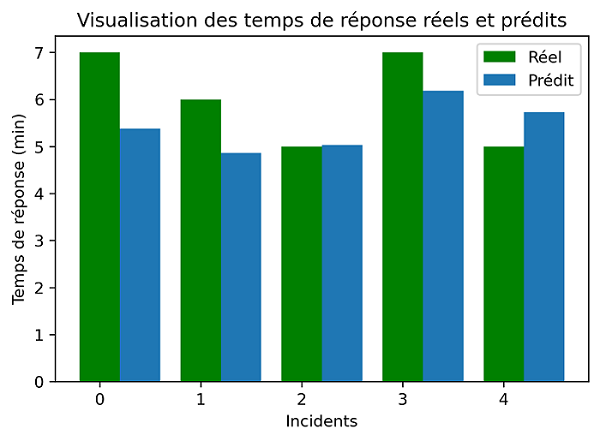

Nous observons que notre modèle peut donner des résultats proches de la valeur réelle, c’est le cas pour l’incident 2 (temps réel = 5 min 00 sec et temps prédit = 5 min 02 sec). 

Toutefois, nous obtenons également des prédictions moins performantes comme c’est le cas pour l’incident 0 par exemple pour lequel nous obtenons un temps prédit de 5 min 44 sec alors que le temps réel est de 7 min 00 sec soit une différence de plus d’une minute.

En conclusion, malgré des prédictions parfois fidèles à la réalité, notre modèle de Gradient Boosting Regressor n’est pas pour autant optimal et ne parvient pas à prédire très précisément le temps de réponse réel de la brigade des pompiers.


##### **CONCLUSION DU MACHINE LEARNING**

A l’issue de l’étude des différents modèles de prédictions, le Gradient Boosting Regressor nous offre les meilleurs résultats pour un temps d’exécution relativement contenu. 

En effet, la rapidité du modèle demeure à nos yeux un élément primordial compte tenu de la variable cible étudiée.  

Plusieurs pistes d’améliorations sont alors possibles; multiplier les encodeurs et affiner la recherche d’hyperparamètres afin d’augmenter la précision du modèle et la fiabilité des prédictions (ce qui est très important au vu du contexte, situation d’urgence); diminuer le temps de calcul du modèle en optimisant, les données, la pipeline et faire tourner le calcul sur un ordinateur plus puissant. 

De plus, le jeu de données initial comportait des données géographiques de différents types notamment grid reference system. Une exploitation approfondie de ces données permettrait un meilleur apprentissage du modèle et une plus grande précision. 

La finalité de notre étude serait de pouvoir donner au modèle la localisation géographique d’un incident, afin de déterminer la caserne pouvant intervenir le plus rapidement et prédire ce temps de réponse.


##**5. CODE**

### **Importation des packages, lecture et prétraitement du jeu de données**

In [ ]:
# Importation des packages
import pandas as pd
import datetime as dt

# Lecture et merge des DataFrame
df1 = pd.read_csv(r'LFB+Incident+data+from+January+2017.csv', sep = ';')
df2 = pd.read_csv(r'LFB+Mobilisation+data+from+January+2017.csv', sep = ';')
df = df2.merge(df1, on = 'IncidentNumber')

#  Création de la variable cible 'ResponseTimeMinute'
df['DateAndTimeMobilised'] = pd.to_datetime(df['DateAndTimeMobilised'])
df['DateAndTimeArrived'] = pd.to_datetime(df['DateAndTimeArrived'])
df['ResponseTimeMinute'] = (df['DateAndTimeArrived'] - df['DateAndTimeMobilised']).dt.total_seconds()/60

# Création des variables 'HourMobilised', 'WeekdayMobilised', 'MonthMobilised'
df['HourMobilised'] = pd.to_datetime(df['DateAndTimeMobilised']).dt.hour
df['WeekdayMobilised'] = pd.to_datetime(df['DateAndTimeMobilised']).dt.weekday
df['MonthMobilised'] = pd.to_datetime(df['DateAndTimeMobilised']).dt.month

# Création de la variable 'CityCenter'
CityCenter = ['ISLINGTON', 'WESTMINSTER', 'HARINGEY', 'SOUTHWARK', 'TOWER HAMLETS', 'HACKNEY', 'NEWHAM', 'LAMBETH', 'CAMDEN',
               'WANDSWORTH', 'LEWISHAM', 'CITY OF LONDON', 'KENSINGTON AND CHELSEA', 'HAMMERSMITH AND FULHAM']

Peripherie = ['GREENWICH', 'BARKING AND DAGENHAM', 'EALING', 'BRENT', 'REDBRIDGE', 'CROYDON', 'HARROW', 'ENFIELD', 'BROMLEY',
              'BEXLEY', 'HAVERING', 'MERTON', 'HOUNSLOW', 'BARNET', 'HILLINGDON', 'SUTTON', 'WALTHAM FOREST', 
              'KINGSTON UPON THAMES', 'RICHMOND UPON THAMES']

df['CityCenter'] = df['IncGeo_BoroughName'].apply(lambda x: x in CityCenter)

# Nettoyage de la variable cible

# On cherche les temps de réponse négatifs
# df_new = df[df['ResponseTimeMinute'] < 0] # Il y a 128 incidents concernés (0.02 % des données)

# On cherche les temps de réponse aberrants Ex : ici supérieurs à 1h (60 min)
# df_new = df[df['ResponseTimeMinute'] > 60] # Il y a 679 incidents concernés (0.11 % des données)

# On supprime les incidents pour lesquels le temps de réponse est négatif ou supérieur à 1h (60 min)
df = df[(df['ResponseTimeMinute'] > 0) & (df['ResponseTimeMinute'] < 60)]

# Sélection des variables d'intérêt

df = df[['IncidentNumber',
         'ResponseTimeMinute',
         'PropertyCategory',
         'AddressQualifier',
         'IncGeo_BoroughName',
         'IncidentStationGround',
         'FirstPumpArriving_DeployedFromStation',
         'DeployedFromStation_Name',
         'DeployedFromLocation',
         'PumpOrder',
         'HourMobilised',
         'WeekdayMobilised',
         'MonthMobilised',
         'CityCenter',
         'CalYear']]

df.head()

# Recherche et suppression des quelques données manquantes
df.isna().sum()
df = df.dropna(axis = 0, how = 'any')

# Export du DataFrame nettoyé au format csv
df.to_csv('Pyrefighter_cleaned_database.csv', sep=';', index = False) 

### **Data visualisation et analyses statistiques**

**Distribution du nombre d\'incidents en fonction du temps de réponse**

In [ ]:
#Création du graphique
plt.figure(figsize=(10,5))
plt.hist(df['ResponseTimeMinute'], rwidth = 0.7, range = (1,21), align = 'left', bins = 20)
plt.xticks(range(1,21))
plt.xlabel('Temps de réponse (min)')
plt.ylabel('Nombre d\'incidents')
plt.title('Distribution du nombre d\'incidents en fonction du temps de réponse (min)');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTime.png", dpi = 300)

**Distribution du temps de réponse en fonction de l'heure de la journée**

In [ ]:
#Création du graphique
sns.catplot(x = 'HourMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6.4)
plt.xlabel('Heure')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de l\'heure de la journée');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_HourMobilised.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ HourMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du nombre d'incidents en fonction de l'heure de la journée**

In [ ]:
#Création du graphique
incident_per_hour = df.groupby('HourMobilised', as_index = False).agg({'IncidentNumber':'count'})
plt.bar(incident_per_hour['HourMobilised'],incident_per_hour['IncidentNumber'])
plt.xlabel('Heure')
plt.ylabel('Nombre d\'incidents')
plt.title('Distribution du nombre d\'incidents en fonction de l\'heure de la journée');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("NumberOfIncidentPerHour.png", dpi = 300, bbox_inches='tight')

**Distribution du temps de réponse en fonction du jour de la semaine**

In [ ]:
#Création du graphique
viz = sns.catplot(x = 'WeekdayMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6)
plt.xticks([0,1,2,3,4,5,6], ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
viz.set_xticklabels(rotation=75)
plt.xlabel('Jour')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du jour de la semaine');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_WeekdayMobilised", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ WeekdayMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction du mois**

In [ ]:
#Création du graphique
sns.catplot(x = 'MonthMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6)
plt.xlabel('Mois')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du mois');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_MonthMobilised.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ MonthMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction de l'heure de la journée et par année**

In [ ]:
#Création du graphique
df['Année'] = df['CalYear']
viz = sns.catplot(x = 'HourMobilised', y = 'ResponseTimeMinute', kind = 'bar', hue = 'Année', data = df)
plt.ylim(5,6.5)
viz.fig.set_size_inches(12,5)
plt.xlabel('Heure')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de l\'heure de la journée et par année');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_HourMobilised_Year.png", dpi = 300, bbox_inches='tight')

**Distribution du temps de réponse en fonction du mois et par année**

In [ ]:
#Création du graphique
viz = sns.catplot(x = 'MonthMobilised', y = 'ResponseTimeMinute', kind = 'bar', hue = 'Année', data = df)
plt.ylim(5,6.5)
viz.fig.set_size_inches(12,5)
plt.xlabel('Mois')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du mois et par année');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_MonthMobilised_Year.png", dpi = 300, bbox_inches='tight')

**Distribution du temps de réponse en fonction du type de propriété**

In [ ]:
#Création du graphique
viz = sns.catplot(x = 'PropertyCategory', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=75)
plt.ylim(5,8)
plt.xlabel('Type de propriété')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du type de propriété');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_PropertyCategory.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ PropertyCategory', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction de l'exactitude de l'adresse**

In [ ]:
#Création du graphique
viz = sns.catplot(x = 'AddressQualifier', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.ylim(5,10)
viz.fig.set_size_inches(10,7)
plt.xlabel('Exactitude de l\'adresse')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de l\'exactitude de l\'adresse');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_AddressQualifier.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ AddressQualifier', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction de l'arrondissement où l'incident a eu lieu**

In [ ]:
#Création du graphique
df_sorted = df.groupby(["IncGeo_BoroughName"])['ResponseTimeMinute'].aggregate(np.mean).reset_index().sort_values('ResponseTimeMinute')
viz = sns.catplot(x = 'IncGeo_BoroughName', y = 'ResponseTimeMinute', kind = 'bar', order = df_sorted["IncGeo_BoroughName"], data = df)
viz.fig.set_size_inches(15,5)
viz.set_xticklabels(rotation=90)
plt.ylim(5,7)
plt.xlabel('Arrondissement de l\'incident')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de l\'arrondissement où l\'incident a eu lieu');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_IncGeo_BoroughName.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ IncGeo_BoroughName', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction de la localisation de l'incident centre ville/périphérie**

In [ ]:
#Création du graphique
viz = sns.catplot(x = 'CityCenter', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.xlabel('Centre ville')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de la localisation de l\'incident centre ville/périphérie');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_CityCenter.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ CityCenter', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction de la caserne responsable de la zone d'incident**

In [ ]:
#Création du graphique
df_sorted = df.groupby(["IncidentStationGround"])['ResponseTimeMinute'].aggregate(np.mean).reset_index().sort_values('ResponseTimeMinute')
viz = sns.catplot(x = 'IncidentStationGround', y = 'ResponseTimeMinute', kind = 'bar', order = df_sorted["IncidentStationGround"], data = df)
viz.fig.set_size_inches(16,5)
viz.set_xticklabels(rotation=90)
plt.ylim(4,9)
plt.xlabel('Caserne responsable de la zone d\'incident')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de la caserne responsable de la zone d\'incident');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_IncidentStationGround.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ IncidentStationGround', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction du 1er camion arrivé sur les lieux**

In [ ]:
#Création du graphique
df_sorted = df.groupby(["FirstPumpArriving_DeployedFromStation"])['ResponseTimeMinute'].aggregate(np.mean).reset_index().sort_values('ResponseTimeMinute')
viz = sns.catplot(x = 'FirstPumpArriving_DeployedFromStation', y = 'ResponseTimeMinute', kind = 'bar', order = df_sorted["FirstPumpArriving_DeployedFromStation"], data = df)
viz.fig.set_size_inches(16,5)
viz.set_xticklabels(rotation=90)
plt.ylim(4,16)
plt.xlabel('Premier camion arrivé sur les lieux (nom de la caserne correspondante)')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du 1er camion arrivé sur les lieux');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_FirstPumpArriving_DeployedFromStation.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ FirstPumpArriving_DeployedFromStation', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction de la caserne déployée**

In [ ]:
#Création du graphique
df_sorted = df.groupby(["DeployedFromStation_Name"])['ResponseTimeMinute'].aggregate(np.mean).reset_index().sort_values('ResponseTimeMinute')
viz = sns.catplot(x = 'DeployedFromStation_Name', y = 'ResponseTimeMinute', kind = 'bar', order = df_sorted["DeployedFromStation_Name"], data = df)
viz.fig.set_size_inches(16,5)
viz.set_xticklabels(rotation=90)
plt.ylim(4,8)
plt.xlabel('Nom de la caserne déployée')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de la caserne déployée');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_DeployedFromStation_Name.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ DeployedFromStation_Name', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

**Distribution du temps de réponse en fonction du lieu de déploiement de la brigade**

In [ ]:
#Création du graphique
viz = sns.catplot(x = 'DeployedFromLocation', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.xlabel('Lieu de déploiement de la brigade')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du lieu de déploiement de la brigade');

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ResponseTimeMinute_DeployedFromLocation.png", dpi = 300, bbox_inches='tight')

# Test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ DeployedFromLocation', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

# Impression pour formater table
print(table.to_markdown())

### **Machine Learning**

**Importation des packages**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from category_encoders.target_encoder import TargetEncoder
from category_encoders.count import CountEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

from time import time

**Lecture du jeu de données et préparation des variables**

In [ ]:
# Lecture du DataFrame
df = pd.read_csv('Pyrefighter_cleaned_database.csv', sep = ';')

# On conserve uniquement les données pour le 1er camion arrivé sur les lieux
df = df[(df["PumpOrder"] == 1)]

# Variables non pertinentes à supprimer
to_drop = ['IncidentNumber',
           'CalYear',
           'AddressQualifier',
           'FirstPumpArriving_DeployedFromStation',
           'PumpOrder']

# Sélection des variables qualitatives
categorical = ['PropertyCategory', 'IncGeo_BoroughName', 'IncidentStationGround',
               'DeployedFromStation_Name', 'DeployedFromLocation','HourMobilised', 'WeekdayMobilised', 'MonthMobilised']

# Retype des variables qualitatives
df[categorical] = df[categorical].astype(str)

# Sélection des 3 variables dont l'interaction est susceptible d'avoir un effet sur la variable cible
# Ne sera pas utilisé pour les modèles de type arbre
to_poly = ['HourMobilised', 'WeekdayMobilised', 'CityCenter']

**REGRESSION LINEAIRE**

In [ ]:
# REGRESSION LINEAIRE - RECHERCHE DES PARAMETRES OPTIMAUX

# On sélection un échantillon de 10 000 lignes
df_sample = df.sample(n = 10000, random_state = 42)

# Pour chaque variable de categorial, on rassemble les catégories trop petites dans une catégorie 'Other'
for col in categorical:
    for value, valueCount in df_sample[col].value_counts().items():
        if valueCount < 100:
            df_sample[col] = df_sample[col].replace(value, 'Other')

# Séparation de le variable cible des variables explicatives
target_sample = df_sample['ResponseTimeMinute']
data_sample = df_sample.drop(['ResponseTimeMinute'], axis = 1)

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data_sample, target_sample, test_size = 0.2, random_state = 1)

# Pipeline de test d'interaction des 3 variables sélectionnées
poly_features = Pipeline(steps = [("ohe", OneHotEncoder()),
    
                                  ("poly", PolynomialFeatures(include_bias = False,
                                                              interaction_only = True)),
                                  ("target", TargetEncoder())])

# Suppression des variables inutiles, application de la méthode PolynomialFeatures et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("poly_features", poly_features, to_poly),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

selector = SelectKBest()   
linreg = LinearRegression()

linreg_pipe = Pipeline([('preprocesser', preprocesser),
                        ('selection', selector),   
                        ('model', linreg)])

# Paramètres testés par le GridSearchCV
param_grid = {
    'model__fit_intercept' : [True, False],
    'preprocesser__poly_features__poly__degree' : [2, 3],
    'preprocesser__count_encode__min_group_size' : [10, 50, 100]
}

# Recherche des paramètres optimaux
grid = GridSearchCV(estimator = linreg_pipe, param_grid = param_grid, cv = 5, iid = True, n_jobs=-1)

grid.fit(X_train,y_train)  

print('Les meilleurs paramètres trouvés sont :', grid.best_params_) 

In [ ]:
# REGRESSION LINEAIRE - EXECUTION DU MODELE AVEC LES PARAMETRES OPTIMAUX

# On mesure le temps d'exécution du modèle
t0 = time()

# Séparation de le variable cible des variables explicatives
target = df['ResponseTimeMinute']
data = df.drop(['ResponseTimeMinute'], axis = 1)

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)

# Pipeline de test d'interaction des 3 variables sélectionnées       
poly_features = Pipeline(steps = [("ohe", OneHotEncoder()),
    
                                  ("poly", PolynomialFeatures(degree = 2,
                                                              include_bias = False,
                                                              interaction_only = True)),
                                  ("target", TargetEncoder())])

# Suppression des variables inutiles, application de la méthode PolynomialFeatures et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("poly_features", poly_features, to_poly),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

# Pamarètre optimaux sélectionnés
params = {'fit_intercept': False}
linreg = LinearRegression(**params)

linreg_pipe = Pipeline([('preprocesser', preprocesser),   
                        ('model', linreg)])

linreg_pipe.fit(X_train,y_train)  
y_pred = linreg_pipe.predict(X_test)
ResponseTimeMinute_mean = df['ResponseTimeMinute'].mean()

print('Score MSE train :', mean_squared_error(y_train, linreg_pipe.predict(X_train)))
print('Score MAE train (en minute) :', mean_absolute_error(y_train, linreg_pipe.predict(X_train)))
print('Score MSE test', mean_squared_error(y_test, linreg_pipe.predict(X_test)))
print('Score MAE test (en minute)', mean_absolute_error(y_test, linreg_pipe.predict(X_test)))
print("\nRelative test error:", mean_absolute_error(y_test, linreg_pipe.predict(X_test))/ResponseTimeMinute_mean)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

**RIDGE REGRESSOR**

In [ ]:
# RIDGE REGRESSOR - RECHERCHE DES PARAMETRES OPTIMAUX

# On sélection un échantillon de 10 000 lignes
df_sample = df.sample(n = 10000, random_state = 42)

# Pour chaque variable de categorial, on rassemble les catégories trop petites dans une catégorie 'Other'
for col in categorical:
    for value, valueCount in df_sample[col].value_counts().items():
        if valueCount < 100:
            df_sample[col] = df_sample[col].replace(value, 'Other')

# Séparation de le variable cible des variables explicatives
target_sample = df_sample['ResponseTimeMinute']
data_sample = df_sample.drop(['ResponseTimeMinute'], axis = 1)

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data_sample, target_sample, test_size = 0.2, random_state = 1)

# Pipeline de test d'interaction des 3 variables sélectionnées
poly_features = Pipeline(steps = [("ohe", OneHotEncoder()),
    
                                  ("poly", PolynomialFeatures(degree = 2,
                                                              include_bias = False,
                                                              interaction_only = True)),
                                  ("target", TargetEncoder())])

# Suppression des variables inutiles, application de la méthode PolynomialFeatures et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("poly_features", poly_features, to_poly),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

ridge_reg = Ridge(random_state = 42)

ridge_reg_pipe = Pipeline([('preprocesser', preprocesser),          
                     ('model', ridge_reg)])   

# Paramètres testés par le GridSearchCV
param_grid = {
    'preprocesser__poly_features__poly__degree' : [2, 3],
    'preprocesser__count_encode__min_group_size' : [10, 50, 100],
    'model__alpha': [float(x) for x in np.linspace(start = 0.000001, stop = 10, num = 10)]
}

grid = GridSearchCV(estimator = ridge_reg_pipe, param_grid = param_grid, cv = 5, iid = True, n_jobs=-1)

grid.fit(X_train, y_train)
print('Les meilleurs paramètres trouvés sont :', grid.best_params_)

In [ ]:
# RIDGE REGRESSOR - EXECUTION DU MODELE AVEC LES PARAMETRES OPTIMAUX

# On mesure le temps d'exécution du modèle
t0 = time()

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
target = df['ResponseTimeMinute']
data = df.drop(['ResponseTimeMinute'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)

# Pipeline de test d'interaction des 3 variables sélectionnées
poly_features = Pipeline(steps = [("ohe", OneHotEncoder()),
    
                                  ("poly", PolynomialFeatures(degree = 2,
                                                              include_bias = False,
                                                              interaction_only = True)),
                                  ("target", TargetEncoder())])

# Suppression des variables inutiles, application de la méthode PolynomialFeatures et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("poly_features", poly_features, to_poly),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

# Pamarètre optimaux sélectionnés
params = {'alpha': 10.0, 'random_state':  42}
ridge_reg = Ridge(**params)

ridge_reg_pipe = Pipeline([('preprocesser', preprocesser),          
                     ('model', ridge_reg)])   

ridge_reg_pipe.fit(X_train, y_train)
ResponseTimeMinute_mean = df['ResponseTimeMinute'].mean()

print('Score MSE train :', mean_squared_error(y_train, ridge_reg_pipe.predict(X_train)))
print('Score MAE train (en minute) :', mean_absolute_error(y_train, ridge_reg_pipe.predict(X_train)))
print('Score MSE test', mean_squared_error(y_test, ridge_reg_pipe.predict(X_test)))
print('Score MAE test (en minute)', mean_absolute_error(y_test, ridge_reg_pipe.predict(X_test)))
print("\nRelative test error:", mean_absolute_error(y_test, ridge_reg_pipe.predict(X_test))/ResponseTimeMinute_mean)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

**LASSO REGRESSOR**

In [ ]:
# LASSO REGRESSOR - RECHERCHE DES PARAMETRES OPTIMAUX

# On sélection un échantillon de 10 000 lignes
df_sample = df.sample(n = 10000, random_state = 42)

# Pour chaque variable de categorial, on rassemble les catégories trop petites dans une catégorie 'Other'
for col in categorical:
    for value, valueCount in df_sample[col].value_counts().items():
        if valueCount < 100:
            df_sample[col] = df_sample[col].replace(value, 'Other')

# Séparation de le variable cible des variables explicatives
target_sample = df_sample['ResponseTimeMinute']
data_sample = df_sample.drop(['ResponseTimeMinute'], axis = 1)

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data_sample, target_sample, test_size = 0.2, random_state = 1)

# Pipeline de test d'interaction des 3 variables sélectionnées
poly_features = Pipeline(steps = [("ohe", OneHotEncoder()),
    
                                  ("poly", PolynomialFeatures(degree = 2,
                                                              include_bias = False,
                                                              interaction_only = True)),
                                  ("target", TargetEncoder())])

# Suppression des variables inutiles, application de la méthode PolynomialFeatures et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("poly_features", poly_features, to_poly),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

lasso_reg = Lasso(random_state = 42)

lasso_reg_pipe = Pipeline([('preprocesser', preprocesser),          
                     ('model', lasso_reg)])   

# Paramètres testés par le GridSearchCV
param_grid = {
    'preprocesser__poly_features__poly__degree' : [2, 3],
    'preprocesser__count_encode__min_group_size' : [10, 50, 100],
    'model__alpha': [float(x) for x in np.linspace(start = 0.000001, stop = 10, num = 10)]
}

grid = GridSearchCV(estimator = lasso_reg_pipe, param_grid = param_grid, cv = 5, iid = True, n_jobs=-1)

grid.fit(X_train, y_train)
print('Les meilleurs paramètres trouvés sont :', grid.best_params_) 

In [ ]:
# LASSO REGRESSOR - EXECUTION DU MODELE AVEC LES PARAMETRES OPTIMAUX

# On mesure le temps d'exécution du modèle
t0 = time()

# Séparation de le variable cible des variables explicatives
target = df['ResponseTimeMinute']
data = df.drop(['ResponseTimeMinute'], axis = 1)

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)

# Pipeline de test d'interaction des 3 variables sélectionnées
poly_features = Pipeline(steps = [("ohe", OneHotEncoder()),
    
                                  ("poly", PolynomialFeatures(degree = 2,
                                                              include_bias = False,
                                                              interaction_only = True)),
                                  ("target", TargetEncoder())])

# Suppression des variables inutiles, application de la méthode PolynomialFeatures et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("poly_features", poly_features, to_poly),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

# Pamarètre optimaux sélectionnés
params = {'alpha': 1e-06, 'random_state':  42}
lasso_reg = Lasso(**params)

lasso_reg_pipe = Pipeline([('preprocesser', preprocesser),          
                     ('model', lasso_reg)])   

lasso_reg_pipe.fit(X_train, y_train)
ResponseTimeMinute_mean = df['ResponseTimeMinute'].mean()

print('Score MSE train :', mean_squared_error(y_train, lasso_reg_pipe.predict(X_train)))
print('Score MAE train (en minute) :', mean_absolute_error(y_train, lasso_reg_pipe.predict(X_train)))
print('Score MSE test', mean_squared_error(y_test, lasso_reg_pipe.predict(X_test)))
print('Score MAE test (en minute)', mean_absolute_error(y_test, lasso_reg_pipe.predict(X_test)))
print("\nRelative test error:", mean_absolute_error(y_test, lasso_reg_pipe.predict(X_test))/ResponseTimeMinute_mean)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

**GRADIENT BOOSTING REGRESSOR**

In [ ]:
# GRADIENT BOOSTING REGRESSOR - RECHERCHE DES PARAMETRES OPTIMAUX

# On sélection un échantillon de 10 000 lignes
df_sample = df.sample(n = 10000, random_state = 42)

# Pour chaque variable de categorial, on rassemble les catégories trop petites dans une catégorie 'Other'
for col in categorical:
    for value, valueCount in df_sample[col].value_counts().items():
        if valueCount < 100:
            df_sample[col] = df_sample[col].replace(value, 'Other')

# Séparation de le variable cible des variables explicatives
target_sample = df_sample['ResponseTimeMinute']
data_sample = df_sample.drop(['ResponseTimeMinute'], axis = 1)

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data_sample, target_sample, test_size = 0.2, random_state = 1)

# Suppression des variables inutiles et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

gbr = GradientBoostingRegressor(random_state = 42)

gbr_pipe = Pipeline([('preprocesser', preprocesser),          
                     ('model', gbr)])   

# Paramètres testés par le GridSearchCV
param_grid = {
    'preprocesser__count_encode__min_group_size' : [10, 50, 100],
    'model__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)],
    'model__max_features': ['auto'],
    'model__max_depth': [int(x) for x in np.linspace(0, 100, num = 10)],
    'model__min_samples_split': [1, 10, 100]
}

grid = GridSearchCV(estimator = gbr_pipe, param_grid = param_grid, cv = 5, iid = True, n_jobs=-1)
grid.fit(X_train, y_train)

print('Les meilleurs paramètres trouvés sont :', grid.best_params_) 

In [ ]:
# GRADIENT BOOSTING REGRESSOR - EXECUTION DU MODELE AVEC LES PARAMETRES OPTIMAUX

# On mesure le temps d'exécution du modèle
t0 = time()

# Séparation de le variable cible des variables explicatives
target = df['ResponseTimeMinute']
data = df.drop(['ResponseTimeMinute'], axis = 1)

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)

# Suppression des variables inutiles et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

# Pamarètre optimaux sélectionnés
params = {'max_depth': 11, 'max_features': 'auto', 'min_samples_split': 100, 'n_estimators': 10, 'random_state': 42}

gbr = GradientBoostingRegressor(**params)

gbr_pipe = Pipeline([('preprocesser', preprocesser),          
                     ('model', gbr)])   

gbr_pipe.fit(X_train, y_train)
ResponseTimeMinute_mean = df['ResponseTimeMinute'].mean()

print('Score MSE train :', mean_squared_error(y_train, gbr_pipe.predict(X_train)))
print('Score MAE train (en minute) :', mean_absolute_error(y_train, gbr_pipe.predict(X_train)))
print('Score MSE test', mean_squared_error(y_test, gbr_pipe.predict(X_test)))
print('Score MAE test (en minute)', mean_absolute_error(y_test, gbr_pipe.predict(X_test)))
print("\nRelative test error:", mean_absolute_error(y_test, gbr_pipe.predict(X_test))/ResponseTimeMinute_mean)
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

**VISUALISATION DU MODELE**

In [ ]:
# Visualisation du modèle GRADIENT BOOSTING REGRESSOR

# Séparation de le variable cible des variables explicatives
target = df['ResponseTimeMinute']
data = df.drop(['ResponseTimeMinute'], axis = 1)

# Séparation du jeu de données en un ensemble d'entraînement et un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)

# Suppression des variables inutiles et encodage des variables qualitatives
preprocesser = ColumnTransformer(transformers = [("drop_columns", 'drop', to_drop),
                                                 ("target_encode", TargetEncoder(), categorical),
                                                 ("count_encode", CountEncoder(min_group_size = 10), categorical)],
                                 remainder = 'drop')

# Pamarètre optimaux sélectionnés
params = {'max_depth': 11, 'max_features': 'auto', 'min_samples_split': 100, 'n_estimators': 10, 'random_state': 42}

gbr = GradientBoostingRegressor(**params)

gbr_pipe = Pipeline([('preprocesser', preprocesser),          
                     ('model', gbr)])   

gbr_pipe.fit(X_train, y_train)

y_pred_test = gbr_pipe.predict(X_test)

# On assemble nos données X_test et Y_test dans un DataFrame
df_y_pred_test = pd.DataFrame(y_pred_test)
df_ML = X_test.assign(ResponseTimeMinute = df_y_pred_test.values)

# On sélectionne 5 incidents
df_viz_pred = df_ML[(df_ML["IncidentNumber"] == "169070-18122017") | (df_ML["IncidentNumber"] == "010154-24012020") | (df_ML["IncidentNumber"] == "087083-16072020") | (df_ML["IncidentNumber"] == "066277-26052017") | (df_ML["IncidentNumber"] == "062086-17052017")]
df_viz_reel = df[((df["IncidentNumber"] == "169070-18122017") | (df["IncidentNumber"] == "010154-24012020") | (df["IncidentNumber"] == "087083-16072020") | (df["IncidentNumber"] == "066277-26052017") | (df["IncidentNumber"] == "062086-17052017"))]

# On créé notre graphique
barWidth = 0.4
x1 = range(5)
x2 = [r + barWidth for r in x1 ]

plt.bar(x1, df_viz_reel['ResponseTimeMinute'], color = 'green', label = 'Réel', width = barWidth)
plt.bar(x2, df_viz_pred['ResponseTimeMinute'], label = 'Prédit', width = barWidth)
plt.title('Visualisation des temps de réponse réels et prédits')
plt.ylabel('Temps de réponse (min)')
plt.xlabel('Incidents')
plt.legend();

# Enregistrement de la figure
fig = plt.gcf()
fig.savefig("ModèleGBR.png", dpi = 300, bbox_inches='tight')